In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
df = pd.read_csv('Global.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 79: invalid start byte

In [7]:
import pandas as pd

df = pd.read_csv('Global.csv', encoding='latin-1')
print(df.shape)
df = df.head(500)
print(df.shape)


(121, 9)
(121, 9)


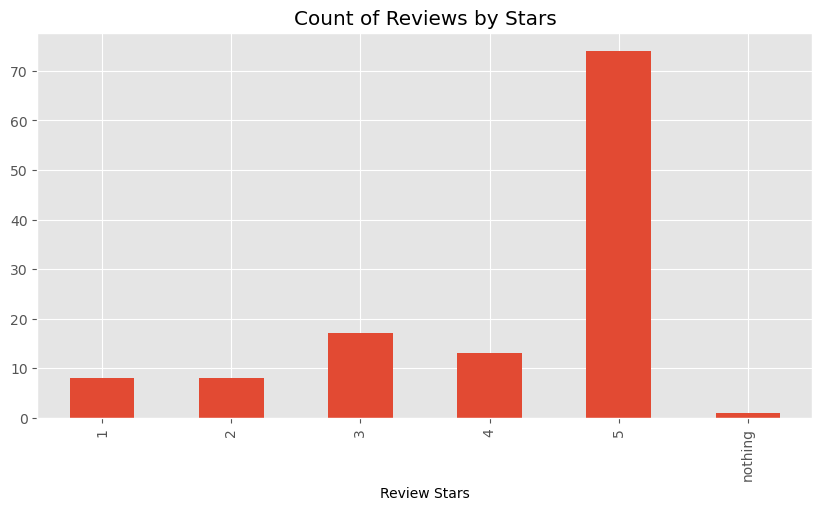

In [9]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [10]:
example = df['Review Title'][50]
print(example)

nothing


In [11]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['nothing']

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [13]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [14]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [15]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [16]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['Review Title'])
    myid = str(row['Id'])
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/121 [00:00<?, ?it/s]

In [17]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

# Convert the 'Id' column to float64 type in the 'vaders' DataFrame
vaders['Id'] = vaders['Id'].astype(float)

# Convert the 'Id' column to float64 type in the 'df' DataFrame
df['Id'] = df['Id'].astype(float)

# Merge the DataFrames
vaders = pd.concat([vaders, df], axis=1)

In [18]:
vaders.head()

,Id,neg,neu,pos,compound,Id,ASIN,Rating,Review Title,Review,Product Name,Brand,Category,Outfit type
0,1.0,0.0,0.272,0.728,0.6549,1.0,a aa B095YQTFS9,5,a Really cute summer top,Really like the color ( hot pink) oversized bu...,MIRACMODA Women Open Back Athlete Loose Fittin...,MIRACMODA Women,Tshirt,G
1,2.0,0.0,1.000,0.000,0.0000,2.0,a B07MDCQR68,4,size is a bit smaller,size is a bit smaller,Levi's Womens Crewneck Classic Batwing Logo T ...,Levi's Womens,Tshirt,G
2,3.0,0.0,0.196,0.804,0.6249,3.0,J7RH0139,5,Great buy,"Nice material, so soft and the fit is good",Tommy Hilfiger womens Ss Core Vandneck Flag Te...,Tommy Hilfiger,Tshirt,G
3,4.0,0.0,0.268,0.732,0.8481,4.0,aa B09RB853ZC,5,Great tshirt for a great price,Its a basic tshirt perfect for daily looks :)H...,TRENDYOL 100% Cotton Crew Neck Boyfriend Knitt...,TRENDYOL 100% Cotton,Tshirt,G
4,5.0,0.0,1.000,0.000,0.0000,5.0,B09MZKNJSF,4,But on the large sizea,Nice top but on the larger side. Normal length...,Vans Women's Drop V Ss Crewandb TandShirt,Vans Women's,Tshirt,G


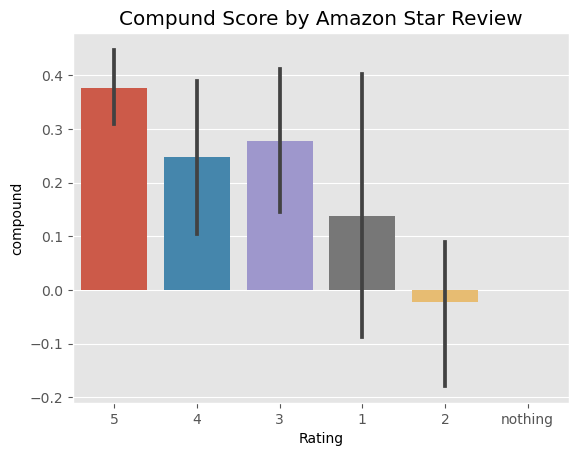

In [19]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

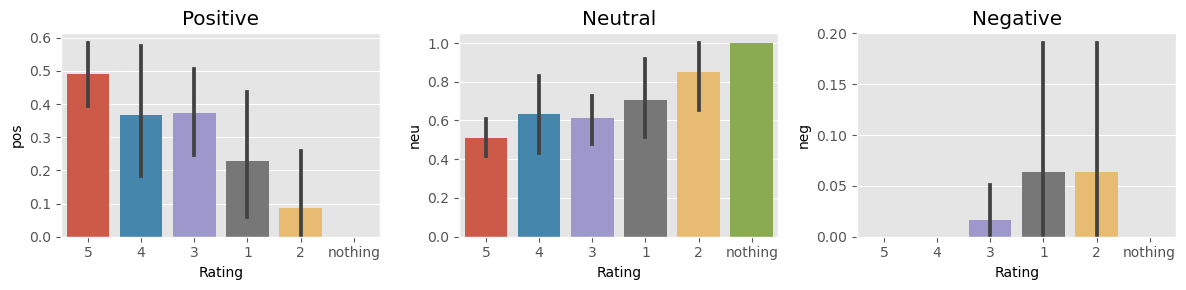

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()